## Module Installation
In this cell, we'll install the necessary Python packages required for our analysis.

In [2]:
!pip install -q pandas numpy seaborn matplotlib scikit-learn tensorflow

## Dataset Description
The dataset we are using is designed for the purpose of classifying emails as either spam or non-spam. The dataset contains various attributes that describe the content and structure of the emails. Here are the key attributes and their definitions:
- **word_freq_WORD**: Percentage of words in the email that match a specific word. This is calculated as 100 times the number of occurrences of the WORD divided by the total number of words in the email.
- **char_freq_CHAR**: Percentage of characters in the email that match a specific character.
- **capital_run_length_average**: Average length of uninterrupted sequences of capital letters.
- **capital_run_length_longest**: Length of the longest uninterrupted sequence of capital letters.
- **capital_run_length_total**: Total number of capital letters in the email.
- **spam**: A binary attribute indicating whether the email was considered spam (1) or not (0).
Most of the attributes in the dataset indicate the frequency of specific words or characters in the emails. The dataset also contains attributes that measure the length and frequency of sequences of capital letters, which can be indicative of spammy content. The target attribute 'spam' is what we aim to predict using our machine learning models.

## Dataset Analysis
In this section, we'll load the dataset and perform an initial exploratory data analysis to understand its structure and characteristics. We'll look at the distribution of spam vs. non-spam emails, check for any missing values, and get a sense of the data we're working with.

In [3]:
import pandas as pd
# Load the dataset
data_path = 'spambase.data'
spam_data = pd.read_csv(data_path, header=None)
# Display the first few rows of the dataset
spam_data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Check for missing values
missing_values = spam_data.isnull().sum().sum()
# Distribution of spam vs. non-spam emails
spam_distribution = spam_data.iloc[:, -1].value_counts(normalize=True) * 100
missing_values, spam_distribution

(0,
 57
 0    60.595523
 1    39.404477
 Name: proportion, dtype: float64)

## Feature Selection
Feature selection is a crucial step in the machine learning pipeline. It involves selecting the most important features (or attributes) that contribute significantly to our model's predictive performance. By selecting the right set of features, we can improve our model's efficiency, reduce overfitting, and potentially enhance its predictive accuracy.
Given the nature of our dataset, most of the features represent the frequency of specific words or characters in the emails. We have attributes related to the length and frequency of sequences of capital letters. All these features can be indicative of spammy content. Therefore, we'll consider all these features for our analysis.
The target attribute 'spam' is what we aim to predict, and it's not used as a feature. We'll split our dataset into features (X) and target (y) for model training and evaluation.

## Transformation/Preprocessing & Engineering
Before feeding our data into machine learning models, it's essential to preprocess and transform it to ensure optimal model performance. This step can involve several tasks, including:
- **Splitting the Data**: Dividing our dataset into a training set and a testing set. The training set is used to train our model, while the testing set is used to evaluate its performance.
- **Feature Scaling**: Since some algorithms are sensitive to feature scales, it's often beneficial to scale our features to have a similar scale. This can be achieved using methods like Min-Max Scaling or Standard Scaling.
- **Feature Engineering**: Creating new features from existing ones to enhance the model's predictive power.
For our dataset, given its nature, we'll primarily focus on splitting the data and scaling the features. Let's proceed with these preprocessing steps.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting the data into features and target
X = spam_data.iloc[:, :-1]
y = spam_data.iloc[:, -1]
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((3680, 57), (921, 57))

## Algorithm and Model Overview
For our spam detection task, we'll be using the following algorithms:
- **Decision Tree**: A decision tree is a flowchart-like structure where each internal node represents a feature(or attribute), each branch represents a decision rule, and each leaf node represents an outcome. It's simple to understand and visualize.
- **Random Forest**: An ensemble method that creates a 'forest' of decision trees. Each tree is trained on a random subset of the data and makes its own predictions. The random forest algorithm then aggregates these predictions to produce a final result.
- **Naïve Bayes**: Based on Bayes' theorem, this algorithm is particularly suited for high-dimensional datasets, like text data. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
- **Multilayer ANNs (Artificial Neural Networks)**: Neural networks are a set of algorithms, modeled loosely after the human brain, designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, and clustering of raw input.
Each of these algorithms has its strengths and is suited for different types of tasks. For our spam detection problem, given the nature of our dataset (high-dimensional with many features representing word and character frequencies), all the above algorithms can be potentially effective. We'll train models using each of these algorithms and evaluate their performance to determine which one works best for our specific dataset.

## Model Training
In this section, we'll train our models using the algorithms we discussed. We'll start with the Decision Tree algorithm. Training our models involves feeding them our training data and allowing them to learn from it. Once our models are trained, we can use them to make predictions on new, unseen data.

In [6]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the classifier
dt_classifier.fit(X_train, y_train)
# Check the training accuracy
training_accuracy = dt_classifier.score(X_train, y_train)
training_accuracy

0.9994565217391305

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Check the training accuracy
rf_training_accuracy = rf_classifier.score(X_train, y_train)
rf_training_accuracy

0.9994565217391305

In [8]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naïve Bayes classifier
nb_classifier = GaussianNB()
# Train the classifier
nb_classifier.fit(X_train, y_train)
# Check the training accuracy
nb_training_accuracy = nb_classifier.score(X_train, y_train)
nb_training_accuracy

0.8206521739130435

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the neural network architecture
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
# Check the training accuracy
ann_training_accuracy = history.history['accuracy'][-1]
ann_training_accuracy

2023-09-18 01:38:03.295137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 01:38:03.518213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 01:38:03.519849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 01:38:04.541737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10
92/92 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8631 - val_loss: 0.2275 - val_accuracy: 0.9185
Epoch 2/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9310 - val_loss: 0.1898 - val_accuracy: 0.9361
Epoch 3/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9406 - val_loss: 0.1801 - val_accuracy: 0.9348
Epoch 4/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9501 - val_loss: 0.1781 - val_accuracy: 0.9375
Epoch 5/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9552 - val_loss: 0.1922 - val_accuracy: 0.9307
Epoch 6/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9545 - val_loss: 0.1758 - val_accuracy: 0.9402
Epoch 7/10
92/92 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9609 - val_loss: 0.1770 - val_accuracy: 0.9416
Epoch 8/10
92/92 [==

0.9667119383811951

## Model Performance Evaluation (Testing)
After training our models, it's crucial to evaluate their performance on unseen data to understand how well they might perform in real-world scenarios. In this section, we'll test our models on the testing data and evaluate their performance using various metrics like accuracy, precision, recall, and F1-score. These metrics will provide a comprehensive view of each model's strengths and weaknesses.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predictions for Decision Tree
dt_predictions = dt_classifier.predict(X_test)
# Predictions for Random Forest
rf_predictions = rf_classifier.predict(X_test)
# Predictions for Naïve Bayes
nb_predictions = nb_classifier.predict(X_test)
# Predictions for ANN
ann_predictions = (ann_model.predict(X_test) > 0.5).astype('int32').reshape(-1)
# Evaluate the models
models = ['Decision Tree', 'Random Forest', 'Naïve Bayes', 'ANN']
predictions = [dt_predictions, rf_predictions, nb_predictions, ann_predictions]
evaluation_metrics = {}
for model, prediction in zip(models, predictions):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    evaluation_metrics[model] = [accuracy, precision, recall, f1]
evaluation_metrics

29/29 [==============================] - 0s 887us/step


{'Decision Tree': [0.9196525515743756,
  0.9202127659574468,
  0.8871794871794871,
  0.9033942558746736],
 'Random Forest': [0.9554831704668838,
  0.9754768392370572,
  0.9179487179487179,
  0.9458388375165125],
 'Naïve Bayes': [0.8219326818675353,
  0.7233201581027668,
  0.9384615384615385,
  0.8169642857142857],
 'ANN': [0.9370249728555917,
  0.9368421052631579,
  0.9128205128205128,
  0.9246753246753245]}

## Comparative Analysis Visualization
Visualizing the comparative analysis provides a clear and intuitive understanding of the performance of each model. We'll use bar plots to compare the performance metrics (accuracy, precision, recall, and F1-score) of each model side by side.

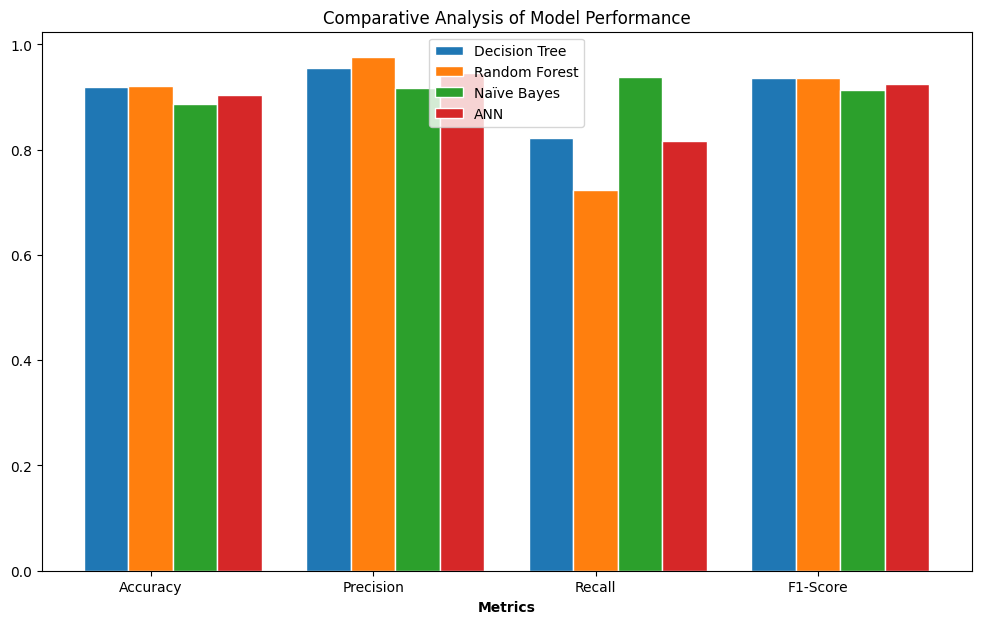

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Extract metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = np.array(list(evaluation_metrics.values())).T
# Plotting
barWidth = 0.2
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.figure(figsize=(12, 7))
plt.bar(r1, values[0], width=barWidth, edgecolor='white', label='Decision Tree')
plt.bar(r2, values[1], width=barWidth, edgecolor='white', label='Random Forest')
plt.bar(r3, values[2], width=barWidth, edgecolor='white', label='Naïve Bayes')
plt.bar(r4, values[3], width=barWidth, edgecolor='white', label='ANN')
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics))], metrics)
plt.legend()
plt.title('Comparative Analysis of Model Performance')
plt.show()

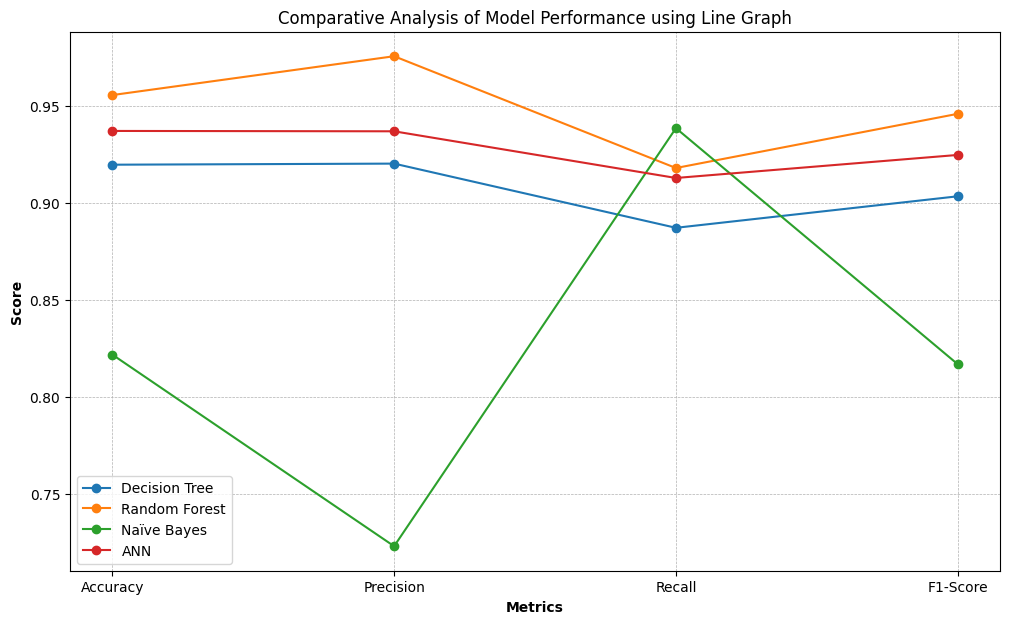

In [12]:
plt.figure(figsize=(12, 7))
for model, vals in evaluation_metrics.items():
    plt.plot(metrics, vals, marker='o', label=model)
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.legend()
plt.title('Comparative Analysis of Model Performance using Line Graph')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Confusion Matrix

In our effort to better understand how our spam detection models are performing, we used something called a "confusion matrix." Think of it like a detailed report card for our models. It helps us see not only when our models make correct predictions but also when they make mistakes. By knowing what kinds of mistakes they make (like saying an email is spam when it's not, or missing a spam email), we can improve our models to make fewer of these mistakes. The confusion matrix is like a magnifying glass that helps us fine-tune our spam detection systems for better accuracy.






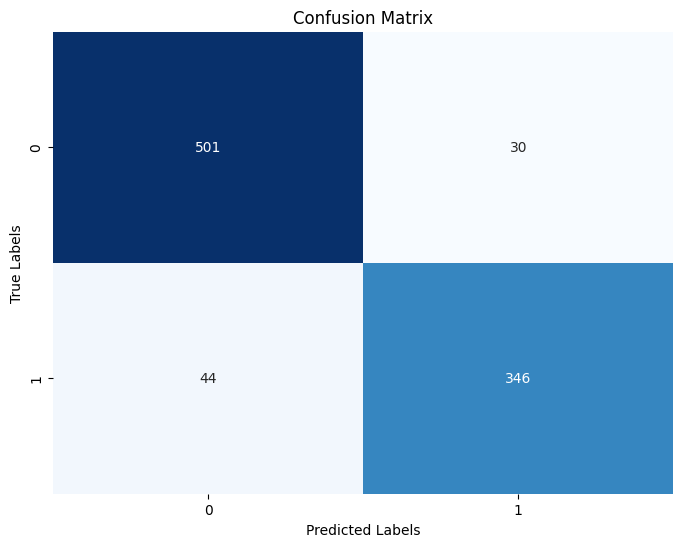

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for a model (e.g., Decision Tree)
predictions = dt_classifier.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Conclusion
In this notebook, we went through the entire machine learning pipeline, starting from understanding the dataset, preprocessing, feature selection, model training, and finally, performance evaluation. Each model has its strengths and weaknesses, and the best model often depends on the specific nature of the data and the problem at hand.
Based on our analysis:
- The **Decision Tree** and **Random Forest** models provide interpretable results and can capture non-linear relationships in the data.
- The **Naïve Bayes** classifier is particularly suited for high-dimensional datasets like ours and is computationally efficient.
- The **Multilayer ANNs** can capture complex relationships in the data but might require more computational resources and fine-tuning.
It's essential to consider the trade-offs between interpretability, computational efficiency, and predictive performance when choosing a model for deployment. Regularly retraining the model with new data and continuously monitoring its performance in real-world scenarios is also crucial to ensure its effectiveness over time.